In [1]:
import numpy as np
import numpy.linalg as la
%matplotlib notebook
import matplotlib.pyplot as plt

# Normal modes of beads connected by springs

### 1. Construct the matrix $\mathbf{K}$. 

*the follwing equation is pasted from text cell 5 of 'PHAS0029 Session 9 Task: Normal modes of beads connected by springs' which is authored by louise.dash@ucl.ac.uk*
\
$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$

[1]
\
where $N$ is the number of beads connected by $N+1$ Hookean springs and $k_{i}$ are the spring constant of $i$ springs. We will be constructing the above tridiagonal matrix using the `np.diag` function:

In [8]:
def tridia(N): 
    '''The tridiagonal matrix K
    Input: N (the number of beads)
    Output: K (tridiagonal matrix (shown above) for a given k_i)
    '''
    
    def k1(N): #this is for when k_i = 1 (ie all K=1)
        '''This is k_i = 1 (ie all k_i=1)
        Input: N (the number of beads)
        Output: list of N number of 1s
        '''
        return np.ones(N) #N number of 1s
    
    def ki(start, n):
        '''This is k_i = i (where i is the integer index of the array)
        Input: n (end of array), start (start of array)
        Output: array of k_i = i values for all given i (between start and n... with each step=1)
        '''
        return np.arange(start, n, 1)

    
    
    K_diag = np.diag(k1(N)) #the first k_i of the addition in the diagonal in diagonal matrix form
    K_diag2 = np.diag(k1(N)) #the second k_i of the addition in the diagonal in diagonal matrix form
    
    K_offdiag_below = np.diag(-k1(N-1), k=-1) #the off-diagonal values that are beneath the diagonal in off-diagonal matrix form
    K_offdiag_above = np.diag(-k1(N-1), k=1) #the off-diagonal values that are above the diagonal in off-diagonal matrix form
    
    K = K_diag + K_diag2 + K_offdiag_below + K_offdiag_above #add all matrices together to give K
    
    return K

N=25
K=tridia(N)  

np.set_printoptions(threshold=2000, linewidth=110,suppress=True)
print("The tridiagonal matrix K is: \n \n", K)

The tridiagonal matrix K is: 
 
 [[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2

When $k_{i}=i$ for all $i$, the matrices (that are to be added together) are defined as follows:

`K_diag = np.diag(ki(0,N))` because we want to start from the begining of the integer indices of the array (0) and end at N.\
`K_diag2 = np.diag(ki(1,N+1))`we end at N+1 and start at 1 because from equation [1], the second addition term in the diagonal element of $\mathbf{K}$ is 1 greater in $i$ than the first.
\
\
`K_offdiag_below = np.diag(-ki(1,N), k=-1)` the - term is there because the off 2 off-diagonal elements are negative (equation [1]) and we start at 1 because we want this matrix to be the same size as the diagonals. `k` denotes the position of the off-diagonal element in the matrix $\mathbf{K}$,\
`K_offdiag_above = np.diag(-ki(1,N), k=1)` the - term is there because the off 2 off-diagonal elements are negative (equation [1]) and we start at 1 because we want this matrix to be the same size as the diagonals. `k` denotes the position of the off-diagonal element in the matrix $\mathbf{K}$.
\
\
\
When $k_{i}=1$ for all $i$, the matrices (that are to be added together) are defined as follows:

`K_diag = np.diag(k1(N))` because we want N number of 1s\
`K_diag2 = np.diag(k1(N))` because we want N number of 1s
\
\
`K_offdiag_below = np.diag(-k1(N-1), k=-1)` the - term is there because the off 2 off-diagonal elements are negative (equation [1]) and we have N-1 1s because we want this matrix to be the same size as the diagonals. `k` denotes the position of the off-diagonal element in the matrix $\mathbf{K}$.\
`K_offdiag_above = np.diag(-k1(N-1), k=1)` the - term is there because the off 2 off-diagonal elements are negative (equation [1]) and we have N-1 1s because we want this matrix to be the same size as the diagonals. `k` denotes the position of the off-diagonal element in the matrix $\mathbf{K}$.

## Note for Marker:

I did not know whether to start the $k_{i}=i$ matrices from $i=0$ or from $i=1$. I thought 0 because it is the start of the integer indices in an array. But I also thought of choosing 1 because the equation for $\mathbf{K}$ starts at $k_{1}$ for the diagonal element. I decided to go with 0 but it can be easilty changed in the code cell above.

### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$

We will use `np.linalg.eigh` to find the eigenvalues and eigenfunctions.

In [9]:
eigval, eigvec = np.linalg.eigh(K) #eigval=eigenvalues and eigvec=eigenvectors

np.set_printoptions(threshold=100, precision=4)
print("The eigenvalues of K are \n", eigval)
print()
print("and corresponding eigenvectors are\n", eigvec)

The eigenvalues of K are 
 [0.0146 0.0581 0.13   0.2291 0.354  0.503  0.6738 0.8639 1.0706 1.2908 1.5214 1.7589 2.     2.2411 2.4786
 2.7092 2.9294 3.1361 3.3262 3.497  3.646  3.7709 3.87   3.9419 3.9854]

and corresponding eigenvectors are
 [[ 0.0334 -0.0664 -0.0983 ... -0.0983  0.0664 -0.0334]
 [ 0.0664 -0.1289 -0.1839 ...  0.1839 -0.1289  0.0664]
 [ 0.0983 -0.1839 -0.2456 ... -0.2456  0.1839 -0.0983]
 ...
 [ 0.0983  0.1839 -0.2456 ... -0.2456 -0.1839 -0.0983]
 [ 0.0664  0.1289 -0.1839 ...  0.1839  0.1289  0.0664]
 [ 0.0334  0.0664 -0.0983 ... -0.0983 -0.0664 -0.0334]]


Printing each individual eigenvector and corresponding eigenvalue:

In [10]:
for j in range(N): 
    print("Eigenvector", j+1, "is \n", eigvec[:,j], "\n with corresponding eigenvalue", eigval[j])
    print()

Eigenvector 1 is 
 [0.0334 0.0664 0.0983 0.1289 0.1576 0.1839 0.2076 0.2283 0.2456 0.2593 0.2693 0.2753 0.2774 0.2753 0.2693
 0.2593 0.2456 0.2283 0.2076 0.1839 0.1576 0.1289 0.0983 0.0664 0.0334] 
 with corresponding eigenvalue 0.014582251803891855

Eigenvector 2 is 
 [-0.0664 -0.1289 -0.1839 -0.2283 -0.2593 -0.2753 -0.2753 -0.2593 -0.2283 -0.1839 -0.1289 -0.0664  0.
  0.0664  0.1289  0.1839  0.2283  0.2593  0.2753  0.2753  0.2593  0.2283  0.1839  0.1289  0.0664] 
 with corresponding eigenvalue 0.05811636514789567

Eigenvector 3 is 
 [-0.0983 -0.1839 -0.2456 -0.2753 -0.2693 -0.2283 -0.1576 -0.0664  0.0334  0.1289  0.2076  0.2593  0.2774
  0.2593  0.2076  0.1289  0.0334 -0.0664 -0.1576 -0.2283 -0.2693 -0.2753 -0.2456 -0.1839 -0.0983] 
 with corresponding eigenvalue 0.12996751462917056

Eigenvector 4 is 
 [ 0.1289  0.2283  0.2753  0.2593  0.1839  0.0664 -0.0664 -0.1839 -0.2593 -0.2753 -0.2283 -0.1289  0.
  0.1289  0.2283  0.2753  0.2593  0.1839  0.0664 -0.0664 -0.1839 -0.2593 -0.2753 -0

### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.

*the follwing equation is pasted from text cell 6 of 'PHAS0029 Session 9 Task: Normal modes of beads connected by springs' which is authored by louise.dash@ucl.ac.uk*

The eigenvalue equation of the spring-bead system is:
$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

where $\mathbf{x}$ is the bead displacement and it is the eigenfunction. $m$ is the mass of each bead and $\omega$ is the angular frequency. Furthermore, we can rearrane the eigenvalue $\lambda = m \omega^2$ to give the angular frequency:

$$\omega = \sqrt{\frac{\lambda}{m}}$$

We will use the `for` loop to calculate the angular frequencies for each eigenvalue $\lambda$ and put them in an array:

In [11]:
m=1#kg
omega_values = [] #empty array
for j in range(N):
    omega = np.sqrt(eigval[j]/m)
    omega_values.append(omega) #put omega into the omega_values array

print("The omega values are: \n", omega_values)

The omega values are: 
 [0.12075699484457145, 0.24107336051064554, 0.3605100756278118, 0.4786313285751153, 0.5950061077104056, 0.7092097740850714, 0.820825610905514, 0.9294463440875371, 1.0346756283553136, 1.1361294934623116, 1.233437745257086, 1.3262453164815906, 1.414213562373095, 1.4970214963422013, 1.5743669612181, 1.6459677317873127, 1.7115625446028953, 1.7709120513064198, 1.82379969198418, 1.8700324853708299, 1.9094417330170912, 1.941883634852104, 1.9672398138942875, 1.9854177481961082, 1.9963511084466352]


We will now plot these angular frequency values against the mode number:

<IPython.core.display.Javascript object>


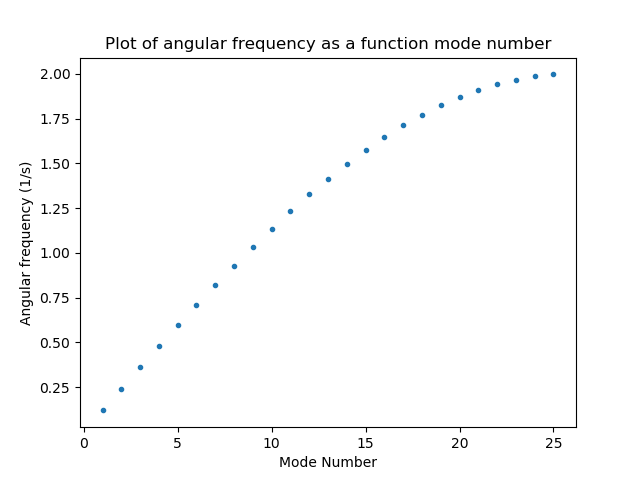

Text(0, 0.5, 'Angular frequency (1/s)')

In [12]:
mode = np.arange(1,N+1,1) #mode number in an array

plt.figure()
plt.plot(mode, omega_values, '.')
plt.title("Plot of angular frequency as a function mode number")
plt.xlabel("Mode Number")
plt.ylabel("Angular frequency (1/s)")

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes, on a single plot.

The bead displacements for each mode are given by the corresponding eigenvector for that mode. So we can plot for the eigenvalue of each mode (here, up to 3) against the bead number for each displacement in that eigenvector:

<IPython.core.display.Javascript object>


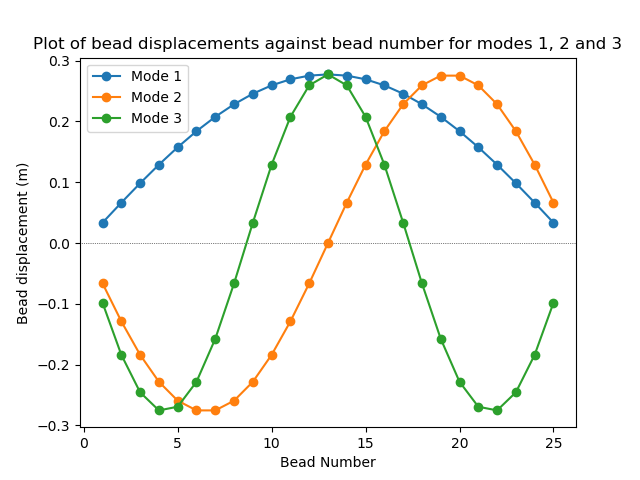

In [13]:
bead_number = np.arange(1,N+1,1) #array of bead number values

plt.figure()
plt.axhline(c='k',ls=':',lw=0.5) #fine black dotted line

plt.plot(bead_number, eigvec[:,0], '-o', label="Mode 1") #eigvec[:,0]) is the eigenvector for mode 1
plt.plot(bead_number, eigvec[:,1], '-o', label="Mode 2") #eigvec[:,1]) is the eigenvector for mode 2
plt.plot(bead_number, eigvec[:,2], '-o', label="Mode 3") #eigvec[:,2]) is the eigenvector for mode 3

plt.title("Plot of bead displacements against bead number for modes 1, 2 and 3")
plt.xlabel("Bead Number")
plt.ylabel("Bead displacement (m)")
plt.legend()

Discussion of $k_{i} = 1$ results:

The higher up in ht number of modes you go, the longer the waveldths of the plots. 

Discussion of $k_{i} = i$ results:
Mode 1 seems to be very linear. Modes 2 and 4 seem to be polynomal curves with mode 2 being very stretched. Overall these results seem to be more "unexpected" than ones for $k_{i} = 1$. 